<a href="https://colab.research.google.com/github/steven1708/Revou-mini-course/blob/main/revou2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the data set

In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [270]:
df=pd.read_csv('amazon_prime_titles.csv')

In [271]:
print(df.head())

  show_id   type                 title        director  \
0      s1  Movie   The Grand Seduction    Don McKellar   
1      s2  Movie  Take Care Good Night    Girish Joshi   
2      s3  Movie  Secrets of Deception     Josh Webber   
3      s4  Movie    Pink: Staying True  Sonia Anderson   
4      s5  Movie         Monster Maker    Giles Foster   

                                                cast         country  \
0     Brendan Gleeson, Taylor Kitsch, Gordon Pinsent          Canada   
1   Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar           India   
2  Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...   United States   
3  Interviews with: Pink, Adele, Beyoncé, Britney...   United States   
4  Harry Dean Stanton, Kieran O'Brien, George Cos...  United Kingdom   

       date_added  release_year rating duration                listed_in  \
0  March 30, 2021          2014    NaN  113 min            Comedy, Drama   
1  March 30, 2021          2018    13+  110 min     Drama, Interna

# Data Cleaning


In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7586 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


# 1.Data Type

data type duration seharusnya int

In [273]:
min=[]
season=[]

for row in df['duration']:
  x=row.split(' ')
  if x[1] =='min':
    min.append(x[0])
    season.append(np.nan)
  elif x[1]=='Seasons':
      season.append(x[0])
      min.append(np.nan)
  elif x[1]=='Season':
      season.append(x[0])
      min.append(np.nan) 

print('done')
print(season)


done
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, '1', '1', nan, '1', '1', nan, '1', nan, nan, '1', '1', '3', '3', '2', '1', nan, nan, nan, '1', nan, nan, nan, nan, nan, nan, '1', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, '1', nan, nan, '1', '2', '1', nan, nan, '1', nan, '3', '1', '1', '1', '1', nan, '1', nan, '1', '1', nan, '1', '1', nan, nan, '1', nan, nan, nan, nan, nan, '4', '1', '1', '1', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, '3', nan, '1', '1', nan, nan, '1', nan, '1', nan, nan, nan, nan, nan, '4', nan, nan, '1', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, '1', '1', '1', '1', nan, nan, '1', nan, nan, '1', '2', nan, '1', nan, nan, nan, nan, '1', nan, nan, nan, '1', nan, nan, nan, nan, nan, nan, nan, '1', '1', nan, nan, nan, '1', '1', nan, nan, nan, nan, nan, '7', '1', '1', nan, nan, nan, nan, '2', nan, nan, nan, nan, nan, nan, '1', nan, '9', nan, '1', '1', nan, '1', '1', nan, nan, '1', '1', nan, '1', '1',

In [274]:
df.insert(10,'min',min)
df.insert(11,'season',season)
print(df.head(20))

   show_id     type                              title  \
0       s1    Movie                The Grand Seduction   
1       s2    Movie               Take Care Good Night   
2       s3    Movie               Secrets of Deception   
3       s4    Movie                 Pink: Staying True   
4       s5    Movie                      Monster Maker   
5       s6    Movie              Living With Dinosaurs   
6       s7    Movie                          Hired Gun   
7       s8    Movie                       Grease Live!   
8       s9    Movie                    Global Meltdown   
9      s10    Movie                     David's Mother   
10     s11    Movie                     Forest Fairies   
11     s12    Movie                          Take Care   
12     s13    Movie           The Night Eats The World   
13     s14    Movie                         Resilencia   
14     s15    Movie  Elon Musk: The Real Life Iron Man   
15     s16    Movie                         Summer '03   
16     s17    

# 2.duplicates

data tidak ada yang diduplicat (title maupun show id)

In [275]:
for col in df.columns:
  print(col)
  print(df[col].value_counts())

show_id
s1       1
s6441    1
s6443    1
s6444    1
s6445    1
        ..
s3223    1
s3224    1
s3225    1
s3226    1
s9668    1
Name: show_id, Length: 9668, dtype: int64
type
Movie      7814
TV Show    1854
Name: type, dtype: int64
title
The Grand Seduction                     1
Under The Smoky Roof                    1
The Shadows                             1
The Porter Brothers                     1
The Intimidation Game                   1
                                       ..
Army Mystery                            1
Armed Girl's Machiavellism              1
Aries Spears: Comedy Blueprint          1
Are They Here? UFOs Caught on Camera    1
Harry Brown                             1
Name: title, Length: 9668, dtype: int64
director
Mark Knight              113
Cannis Holder             61
Moonbug Entertainment     37
Jay Chapman               34
Arthur van Merwijk        30
                        ... 
Andrew Traucki             1
Karyn Kusama               1
K. Subash         

# 3. Data kosong

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7586 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  min           7814 non-null   object
 11  season        1854 non-null   object
 12  listed_in     9668 non-null   object
 13  description   9668 non-null   object
dtypes: int64(1), object(13)
memory usage: 1.0+ MB


In [276]:
df.isna().sum()

show_id            0
type               0
title              0
director        2082
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
min             1854
season          7814
listed_in          0
description        0
dtype: int64

In [277]:
df1=df.dropna(subset=['rating','director'])
df1.isna().sum()

show_id            0
type               0
title              0
director           0
cast             610
country         6702
date_added      7255
release_year       0
rating             0
duration           0
min                0
season          7256
listed_in          0
description        0
dtype: int64

In [278]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7256 entries, 1 to 9667
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7256 non-null   object
 1   type          7256 non-null   object
 2   title         7256 non-null   object
 3   director      7256 non-null   object
 4   cast          6646 non-null   object
 5   country       554 non-null    object
 6   date_added    1 non-null      object
 7   release_year  7256 non-null   int64 
 8   rating        7256 non-null   object
 9   duration      7256 non-null   object
 10  min           7256 non-null   object
 11  season        0 non-null      object
 12  listed_in     7256 non-null   object
 13  description   7256 non-null   object
dtypes: int64(1), object(13)
memory usage: 850.3+ KB


pada analisa kali ini memerlukan metric director dan rating sehingga kedua kolom tersebut disarankan tidak ada yang kosong

sehingga kolom berkurang dari 9668 menjadi 7256

# Analysis --> What most popular Genres?

In [279]:
#make genre sparepartly
genre1= []
genre2= []
genre3= []
genre4= []
genre5= []
genre6= []

for row in df1["listed_in"]:
    x=row.split(",")
    n_element= len(x)
    if n_element == 6:
        genre6.append(x[5])
        genre5.append(x[4])
        genre4.append(x[3])
        genre3.append(x[2])
        genre2.append(x[1])
        genre1.append(x[0])
    if n_element == 5:
        genre6.append(np.nan)
        genre5.append(x[4])
        genre4.append(x[3])
        genre3.append(x[2])
        genre2.append(x[1])
        genre1.append(x[0])
    elif n_element == 4:
        genre6.append(np.nan)
        genre5.append(np.nan)
        genre4.append(x[3])
        genre3.append(x[2])
        genre2.append(x[1])
        genre1.append(x[0])
    elif n_element == 3:
        genre6.append(np.nan)
        genre5.append(np.nan)
        genre4.append(np.nan)
        genre3.append(x[2])
        genre2.append(x[1])
        genre1.append(x[0])
    elif n_element == 2:
        genre6.append(np.nan)
        genre5.append(np.nan)
        genre4.append(np.nan)
        genre3.append(np.nan)
        genre2.append(x[1])
        genre1.append(x[0])
    elif n_element == 1:
        genre6.append(np.nan)
        genre5.append(np.nan)
        genre4.append(np.nan)
        genre3.append(np.nan)
        genre2.append(np.nan)
        genre1.append(x[0])
    else :
        genre6.append(np.nan)
        genre5.append(np.nan)
        genre4.append(np.nan)
        genre3.append(np.nan)
        genre2.append(np.nan)
        genre1.append(np.nan)

print("done")

df1.insert(14,"genre_1",genre1)
df1.insert(15,"genre_2",genre2)
df1.insert(16,"genre_3",genre3)
df1.insert(17,"genre_4",genre4)
df1.insert(18,"genre_5",genre5)
df1.insert(19,"genre_6",genre6)

genres=df1.drop(columns='listed_in')

print("done")
print(genres)

done
done
     show_id   type                 title  \
1         s2  Movie  Take Care Good Night   
16       s17  Movie              Zoombies   
19       s20  Movie                   Zoe   
22       s23  Movie          Zis Boom Bah   
24       s25  Movie              Zandalee   
...      ...    ...                   ...   
9660   s9661  Movie    The Man in the Hat   
9662   s9663  Movie                 River   
9663   s9664  Movie   Pride Of The Bowery   
9665   s9666  Movie               Outpost   
9667   s9668  Movie           Harry Brown   

                                 director  \
1                            Girish Joshi   
16                           Glenn Miller   
19                          Drake Doremus   
22                           William Nigh   
24                          Sam Pillsbury   
...                                   ...   
9660  John-Paul Davidson, Stephen Warbeck   
9662                           Emily Skye   
9663                      Joseph H. Lewis   

        genre  total movie
36      Drama         1847
28     Action         1457
7       Drama         1248
34     Comedy         1206
22   Suspense         1133


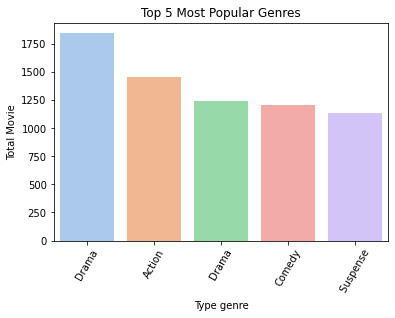

In [280]:
genre1= genres.groupby('genre_1',as_index=False)['title'].count()
genre1.columns=['genre','total movie']
genre1=genre1.set_index('genre')


genre2= genres.groupby('genre_2',as_index=False)['title'].count()
genre2.columns=['genre','total movie']
genre2=genre2.set_index('genre')


genre3= genres.groupby('genre_3',as_index=False)['title'].count()
genre3.columns=['genre','total movie']
genre3=genre3.set_index('genre')

genre4= genres.groupby('genre_4',as_index=False)['title'].count()
genre4.columns=['genre','total movie']
genre4=genre4.set_index('genre')

genre5= genres.groupby('genre_5',as_index=False)['title'].count()
genre5.columns=['genre','total movie']
genre5=genre5.set_index('genre')

genres=[genre1,genre2,genre3,genre4,genre5]
result=pd.concat(genres)
total_genre = result.groupby('genre')['total movie'].sum().reset_index()
total_genre=total_genre.sort_values('total movie',ascending=False)
print(total_genre.head(5))

genreplot=sns.barplot(data=total_genre.head(5), x='genre',y='total movie')
genreplot.set(xlabel='Type genre', ylabel='Total Movie', title='Top 5 Most Popular Genres')
sns.color_palette('pastel')
plt.xticks(rotation=60)
plt.show()

In [281]:
df1.to_csv('movie_final.csv',index=False)